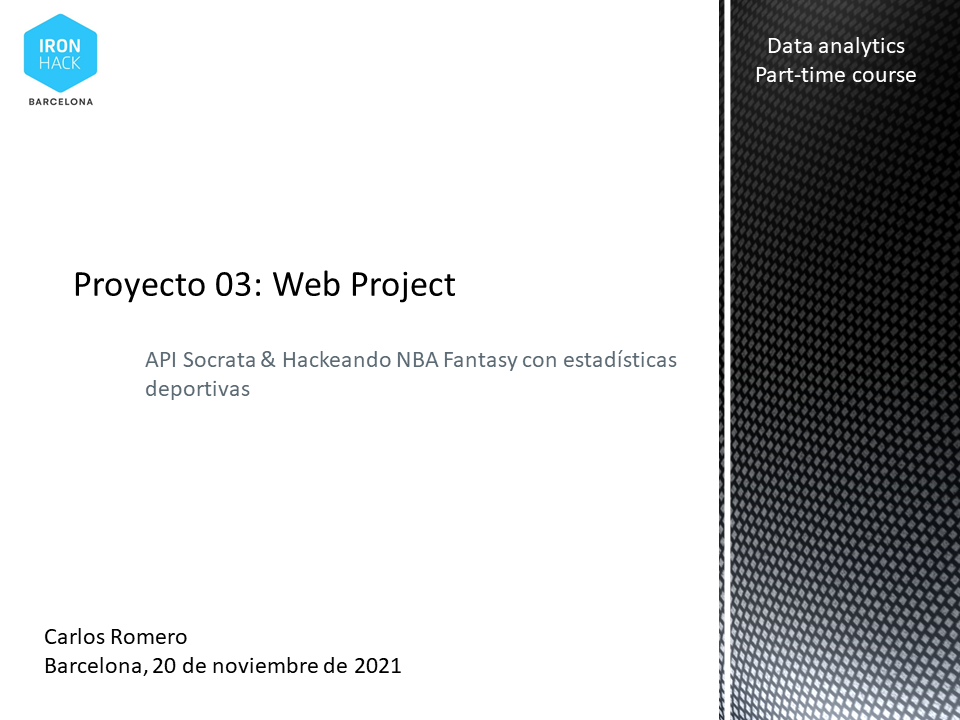

In [1]:
from IPython.display import Image
Image('Proyecto03_portada.png')

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#API-de-Socrata" data-toc-modified-id="API-de-Socrata-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>API de Socrata</a></span><ul class="toc-item"><li><span><a href="#Localizar-web-con-API-y-leer-documentación" data-toc-modified-id="Localizar-web-con-API-y-leer-documentación-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Localizar web con API y leer documentación</a></span></li><li><span><a href="#Accediendo-a-los-datos-mediante-código-sugerido-en-la-documentación" data-toc-modified-id="Accediendo-a-los-datos-mediante-código-sugerido-en-la-documentación-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Accediendo a los datos mediante código sugerido en la documentación</a></span></li><li><span><a href="#Convertir-json-a-dataframe-y-exportar-tabla-a-csv" data-toc-modified-id="Convertir-json-a-dataframe-y-exportar-tabla-a-csv-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Convertir json a dataframe y exportar tabla a csv</a></span></li></ul></li><li><span><a href="#Web-Data-Scraping" data-toc-modified-id="Web-Data-Scraping-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Web Data Scraping</a></span><ul class="toc-item"><li><span><a href="#Localizar-web-con-información-de-mi-equipo-de-liga-fantasy,-mercado-de-jugadores-+-localizar-data-set-de-predicciones" data-toc-modified-id="Localizar-web-con-información-de-mi-equipo-de-liga-fantasy,-mercado-de-jugadores-+-localizar-data-set-de-predicciones-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Localizar web con información de mi equipo de liga fantasy, mercado de jugadores + localizar data set de predicciones</a></span></li><li><span><a href="#Importar-predicciones-de-Nate-Silver" data-toc-modified-id="Importar-predicciones-de-Nate-Silver-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Importar predicciones de Nate Silver</a></span></li><li><span><a href="#Importar-datos-de-mi-equipo-de-NBA-fantasy" data-toc-modified-id="Importar-datos-de-mi-equipo-de-NBA-fantasy-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Importar datos de mi equipo de NBA fantasy</a></span></li><li><span><a href="#Importar-datos-del-mercado-de-NBA-fantasy-del-dia" data-toc-modified-id="Importar-datos-del-mercado-de-NBA-fantasy-del-dia-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Importar datos del mercado de NBA fantasy del dia</a></span></li><li><span><a href="#Ahora-analizamos-la-información-relacionado-dataframes" data-toc-modified-id="Ahora-analizamos-la-información-relacionado-dataframes-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Ahora analizamos la información relacionado dataframes</a></span></li><li><span><a href="#Visualizamos-tabla-de-recomendaciones" data-toc-modified-id="Visualizamos-tabla-de-recomendaciones-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Visualizamos tabla de recomendaciones</a></span></li><li><span><a href="#Exportamos-dataframes-a-csv" data-toc-modified-id="Exportamos-dataframes-a-csv-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>Exportamos dataframes a csv</a></span></li></ul></li></ul></div>

## API de Socrata

### Localizar web con API y leer documentación

Web escogida: 'https://analisi.transparenciacatalunya.cat/''

Dataset de "dades obertes" seleccionado: "Convocatòries de Personal" (https://analisi.transparenciacatalunya.cat/Treball/Convocat-ries-de-Personal/a2hm-uzyj)

Documentación de API: 'https://dev.socrata.com/foundry/analisi.transparenciacatalunya.cat/a2hm-uzyj' 

### Accediendo a los datos mediante código sugerido en la documentación

In [2]:
#importo libreria sodapy de la librería Socrata y otras de utilidad:
from sodapy import Socrata
import pandas as pd
import requests 

In [3]:
#Accedo a la información con método Socrata y parámetros:
with open('./token.txt') as f:
    token=f.read()
with open('./password_api.txt') as f:
    password_api=f.read()  

client = Socrata("analisi.transparenciacatalunya.cat",
                  token,
                  username="carlosrsir@gmail.com",
                  password=password_api)
 
#Utilizo el método de Socrata client.get y amplio el límite a 70000 registros. Obtengo un json llamado “results”
results = client.get("a2hm-uzyj",limit=70000)


### Convertir json a dataframe y exportar tabla a csv

In [4]:
#Convierto el json en un dataframe de Pandas
results_df=pd.json_normalize(results)
results_df.head()

,resum,data_pub,codi_ens,nom_ens,estat,enlla.url,latitud,longitud,:@computed_region_bh64_c7uy,:@computed_region_wvic_k925,geocoded.type,geocoded.coordinates
0,4 places d'Oficial administratiu per a l'Hospi...,2021-05-26T00:00:00.000,9904668001,"Grup d'Assistència Sanitària i Social, SA (SAG...",NO_VIGENT,http://cido.diba.cat/oposicions/8365202,NaN,NaN,NaN,NaN,NaN,NaN
1,1 plaça de Pràctiques Desenvolupament Java,2021-06-23T00:00:00.000,0,"UPCnet, SL",TERMINI_PENDENT,http://cido.diba.cat/oposicions/11934301,41.3904368,2.1142659,512,29,Point,"[2.1142659, 41.3904368]"
2,2 places de Tècnic coordinador de comerç (Pla ...,2017-03-02T00:00:00.000,801930008,"Ajuntament de Barcelona - Barcelona Activa, SA",NO_VIGENT,http://cido.diba.cat/oposicions/6881684,41.4068026,2.1918745,512,29,Point,"[2.1918745, 41.4068026]"
3,1 plaça de Treballador social,2016-01-11T00:00:00.000,808980001,Ajuntament de Gavà,NO_VIGENT,http://cido.diba.cat/oposicions/6259411,41.3045409,2.0000807,559,31,Point,"[2.0000807, 41.3045409]"
4,1 plaça d'Infermer,2020-03-06T00:00:00.000,0,Fundació Els Garrofers,NO_VIGENT,http://cido.diba.cat/oposicions/9898175,41.5920488,2.5855329,618,25,Point,"[2.5855329, 41.5920488]"


In [5]:
#Exportar dataframe a csv en carpeta output:
results_df.to_csv("output\output_api.csv",encoding='latin-1', index=False)

## Web Data Scraping

### Localizar web con información de mi equipo de liga fantasy, mercado de jugadores + localizar data set de predicciones

Web equipo: https://biwenger.as.com/team

Web mercado: https://biwenger.as.com/market
    
Web predicciones: https://projects.fivethirtyeight.com/nba-player-ratings/
+ repositorio con url de dataset: https://github.com/fivethirtyeight/data/tree/master/nba-raptor

In [6]:
# Importación de librerias necesarias
import requests
import time
from selenium import webdriver
from selenium.webdriver.firefox.service import Service

### Importar predicciones de Nate Silver

In [7]:
# Importar datos de url de git y transformarlo en data frame:
url_predict='https://projects.fivethirtyeight.com/nba-model/2022/latest_RAPTOR_by_player.csv'
df_predict= pd.read_csv(url_predict, encoding='latin-1')
df_predict.head()

,player_name,player_id,season,poss,mp,raptor_box_offense,raptor_box_defense,raptor_box_total,raptor_onoff_offense,raptor_onoff_defense,...,raptor_offense,raptor_defense,raptor_total,war_total,war_reg_season,war_playoffs,predator_offense,predator_defense,predator_total,pace_impact
0,Precious Achiuwa,achiupr01,2022,644,314,-3.946451,2.526807,-1.419643,-3.493690,4.199567,...,-4.086793,2.939784,-1.147009,0.256295,0.256295,0,-3.940590,1.938363,-2.002226,-0.199273
1,Steven Adams,adamsst01,2022,805,385,0.235366,-0.168741,0.066625,1.203862,-4.703969,...,0.364184,-0.832418,-0.468234,0.449156,0.449156,0,2.349384,-0.832589,1.516795,0.214620
2,Bam Adebayo,adebaba01,2022,879,427,-0.547735,3.811795,3.264060,-7.804040,5.502365,...,-1.789019,4.223065,2.434046,1.138664,1.138664,0,-0.770189,3.561187,2.790998,0.827937
3,Santi Aldama,aldamsa01,2022,73,35,0.071972,-8.622648,-8.550676,-5.955162,6.445075,...,-0.855911,-6.596023,-7.451934,-0.084017,-0.084017,0,1.987457,-8.117386,-6.129929,0.064794
4,LaMarcus Aldridge,aldrila01,2022,637,306,2.272442,1.952852,4.225294,5.273026,0.841283,...,2.840244,1.818830,4.659074,1.143945,1.143945,0,1.219004,1.038978,2.257983,-1.110867


### Importar datos de mi equipo de NBA fantasy

In [8]:
#prepara conexión con selenium
executable_path=r"C:\Users\carlo\Downloads\geckodriver-v0.30.0-win64\geckodriver.exe"
driver=webdriver.Firefox(executable_path=executable_path)
url='https://biwenger.as.com/login'
driver.get(url)

In [9]:
#hacer login dentro de la página web
login=driver.find_element_by_xpath('/html/body/app-root/main/div/ng-component/div/div[1]/div/div[1]/div[2]/p[1]/a[@role = "button"]')
login.click()
email=driver.find_element_by_name("email")
password=driver.find_element_by_name("password")
email.send_keys('carlosrsir@gmail.com')
with open('./password_biwenger.txt') as f:
    password_nba=f.read()
password.send_keys(password_nba)
login2=driver.find_element(by='css selector', value='.squared')
login2.click()
time.sleep(1) 

In [10]:
#acepto la cookie y navego hasta la url de team
cookie=driver.find_element(by='id', value='didomi-notice-agree-button')
cookie.click()
time.sleep(1)
goto_team=driver.find_element(by='id', value='nav-team')
goto_team.click()
time.sleep(1)
#hay que ordernar que haga scroll para abajo
driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
#selecciono formato tabular
grid=driver.find_element_by_xpath('/html/body/app-root/main/div/ng-component/tabs/div/tab[1]/div/div/user-squad/player-list/adv-list/div[2]/div/label[1]/ui-switch[@role = "switch"]')
grid.click()
time.sleep(1)

In [11]:
#scrapeo la información que me interesa de mi equipo
results=driver.find_elements(by='css selector', value='.ng-star-inserted')
search_results=[]

for ele in results:
    try:
        pos=ele.find_element(by='tag name', value='td').find_element(by='tag name', value='player-position')
        name=ele.find_element(by='css selector', value='.text-left').find_element(by='tag name', value='a')
        value=ele.find_element(by='css selector', value='.tr')
        x=ele.find_element(by='tag name', value='player-status').get_attribute('title')
                
        search_results.append(
        {'Posicion':pos.text,
        'Jugador':name.text,
         'value':value.text,
         })
        
    except:
        pass


In [12]:
#transformo el json resultante en un dataframe
driver.quit()
df_team= pd.DataFrame(search_results)
df_team.head()

,Posicion,Jugador,value
0,B,Chris Paul,12.510.000 $
1,B,Donovan Mitchell,11.370.000 $
2,B,Derrick Rose,3.680.000 $
3,B,George Hill,880.000 $
4,A,Franz Wagner,2.190.000 $


### Importar datos del mercado de NBA fantasy del dia

In [13]:
#prepara conexión con selenium
driver=webdriver.Firefox(executable_path=executable_path)
url='https://biwenger.as.com/login'
driver.get(url)

In [14]:
#hacer login dentro de la página web
login=driver.find_element_by_xpath('/html/body/app-root/main/div/ng-component/div/div[1]/div/div[1]/div[2]/p[1]/a[@role = "button"]')
login.click()
email=driver.find_element_by_name("email")
password=driver.find_element_by_name("password")
email.send_keys('carlosrsir@gmail.com')
with open('./password_biwenger.txt') as f:
    password_nba=f.read()
password.send_keys(password_nba)
login2=driver.find_element(by='css selector', value='.squared')
login2.click()
time.sleep(1)

In [15]:
#acepto la cookie y navego hasta la url de mercado
cookie=driver.find_element(by='id', value='didomi-notice-agree-button')
cookie.click()
goto_market=driver.find_element(by='id', value='nav-market')
goto_market.click()
time.sleep(1)
#hay que ordernar que haga scroll para abajo
driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
#selecciono formato tabular
grid=driver.find_element_by_xpath('/html/body/app-root/main/div/ng-component/tabs/div/tab[1]/div/div/transfer-market/player-list/adv-list/div[2]/div/label[1]/ui-switch[@role = "switch"]')
grid.click()
time.sleep(1)


In [16]:
#scrapeo la información que me interesa de los jugadores libres
results=driver.find_elements(by='css selector', value='.ng-star-inserted')
search_results=[]

for ele in results:
    try:
        pos=ele.find_element(by='tag name', value='td').find_element(by='tag name', value='player-position')
        name=ele.find_element(by='css selector', value='.text-left').find_element(by='tag name', value='a')
        value=ele.find_element(by='css selector', value='.tr')
        x=ele.find_element(by='tag name', value='player-status').get_attribute('title')
        propietario=ele.find_element(by='tag name', value='em')
                
        search_results.append(
        {'Posicion':pos.text,
        'jugador':name.text,
         'value':value.text,
         'estado':x
        })
        
    except:
        pass

In [17]:
#transformo el json resultante en un dataframe
driver.quit()
df_mercado= pd.DataFrame(search_results)
df_mercado.head()


,Posicion,jugador,value,estado
0,B,Trey Burke,320.000 $,En forma
1,B,Elfrid Payton,1.040.000 $,En forma
2,B,Eric Gordon,1.000.000 $,En forma
3,P,Boban Marjanovic,690.000 $,En forma
4,A,Zach LaVine,12.740.000 $,En forma


### Ahora analizamos la información relacionado dataframes

In [18]:
#relaciono los dataframes de biwenger con el de predicciones
df_miequipo=df_team.merge(df_predict, left_on='Jugador', right_on='player_name')
df_elmercado=df_mercado.merge(df_predict, left_on='jugador', right_on='player_name')

In [19]:
#añadir minutos máximos jugados y añadir columna calculada en df_miequipo y df_elmercado

#calculo máximo de minutos jugados
max_mp=df_predict['mp'].max()
#creo una nuevo columna calculada
df_miequipo['Porc_mp']=(df_miequipo['mp']/max_mp)*100
df_elmercado['Porc_mp']=(df_elmercado['mp']/max_mp)*100
#creo rango de confianza en la predicción
df_miequipo['Tipo_predicción']=pd.cut(df_miequipo['Porc_mp'], [0,30,55,100], labels=['Muy arriesgada','Arriesgada','Segura'])
df_elmercado['Tipo_predicción']=pd.cut(df_elmercado['Porc_mp'], [0,30,55,100], labels=['Muy arriesgada','Arriesgada','Segura'])
#creo columna calcula de predicción global
df_miequipo['Predicción_media']=(df_miequipo['raptor_total']+df_miequipo['war_reg_season']+df_miequipo['predator_total'])/3
df_elmercado['Predicción_media']=(df_elmercado['raptor_total']+df_elmercado['war_reg_season']+df_elmercado['predator_total'])/3
#ordenar dataframes
rank_jugadores_vendibles=df_miequipo.sort_values(by='Predicción_media')[['Posicion','Jugador','mp','Predicción_media','Tipo_predicción','value']].reset_index(drop=True)
rank_jugadores_fichables=df_elmercado.sort_values(by='Predicción_media', ascending=False)[['Posicion','jugador','mp','Predicción_media','Tipo_predicción','value']].reset_index(drop=True)
#modificamos indices por estética
rank_jugadores_vendibles.index = rank_jugadores_vendibles.index + 1
rank_jugadores_fichables.index = rank_jugadores_fichables.index + 1

### Visualizamos tabla de recomendaciones

In [20]:
#¿Qué jugadores vendo?
rank_jugadores_vendibles

,Posicion,Jugador,mp,Predicción_media,Tipo_predicción,value
1,A,Franz Wagner,485,-0.117498,Segura,2.190.000 $
2,P,Alperen Sengun,256,0.277235,Arriesgada,970.000 $
3,A,Furkan Korkmaz,387,0.916775,Segura,1.210.000 $
4,B,George Hill,395,1.129104,Segura,880.000 $
5,B,Chris Paul,451,2.720480,Segura,12.510.000 $
6,B,Donovan Mitchell,447,3.752335,Segura,11.370.000 $
7,A,Royce O'Neale,467,3.896573,Segura,2.120.000 $
8,P,Jusuf Nurkic,387,4.167538,Segura,5.780.000 $
9,P,John Collins,509,5.700881,Segura,8.280.000 $
10,B,Derrick Rose,339,7.664021,Segura,3.680.000 $


In [21]:
#¿Qué jugadores compro?
rank_jugadores_fichables

,Posicion,jugador,mp,Predicción_media,Tipo_predicción,value
1,B,Damian Lillard,537,1.252486,Segura,13.340.000 $
2,B,Trey Burke,45,1.130727,Muy arriesgada,320.000 $
3,A,Zach LaVine,528,-0.185331,Segura,12.740.000 $
4,P,Jakob Poeltl,225,-0.377568,Arriesgada,3.600.000 $
5,P,Boban Marjanovic,41,-0.811187,Muy arriesgada,690.000 $
6,B,Lonnie Walker IV,348,-1.510847,Segura,1.360.000 $
7,B,Eric Gordon,338,-1.987188,Segura,1.000.000 $
8,B,R.J. Hampton,270,-2.882202,Arriesgada,610.000 $
9,P,Moritz Wagner,135,-3.736608,Muy arriesgada,370.000 $
10,B,Elfrid Payton,75,-4.992213,Muy arriesgada,1.040.000 $


### Exportamos dataframes a csv

In [33]:
rank_jugadores_vendibles.to_csv("ranksales.csv",encoding='latin-1', index=True)
rank_jugadores_fichables.to_csv("rankmarket.csv",encoding='latin-1', index=True)
